**EDA on Haberman dataset**



**Relevant information**

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

---


**Attributes**

1.   Age : Numerical(int64)
2.   Year of operation: Numerical(int64)
3.   Positive axillary lymph nodes : Numerical(int64)
4.   Survival status : Numerical(int64) 


---


**Objective**

To predict whether a patient will survive or not after undergoing surgery for breast cancer


In [1]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Number of Datapoints**

In [3]:
#Read the data from file and load it in pandas dataframe
#from google.colab import drive
#drive.mount('/content/drive')
df_haberman=pd.read_csv("haberman.csv")
print(df_haberman.shape)

(306, 4)


In [4]:
#Renaming the column names to make it more meaningful
df_haberman.columns=["Age","Operational year","Postive_axil_nodes","survival status"]
print(df_haberman.head())

   Age  Operational year  Postive_axil_nodes  survival status
0   30                64                   1                1
1   30                62                   3                1
2   30                65                   0                1
3   31                59                   2                1
4   31                65                   4                1


In [0]:
df_haberman["survival status"].value_counts()

1    225
2     81
Name: survival status, dtype: int64

**Observations:**

*   It is an imbalanced dataset as the number of data points for both the classes are unequal





In [0]:
#Informations about the columns of this dataset
print(df_haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Operational year      306 non-null int64
Postive_axil_nodes    306 non-null int64
survival status       306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


**Observations**

*   There are no missing values in this dataset.
*   All the columns in this dataset are in integer format



**Pair-plot**

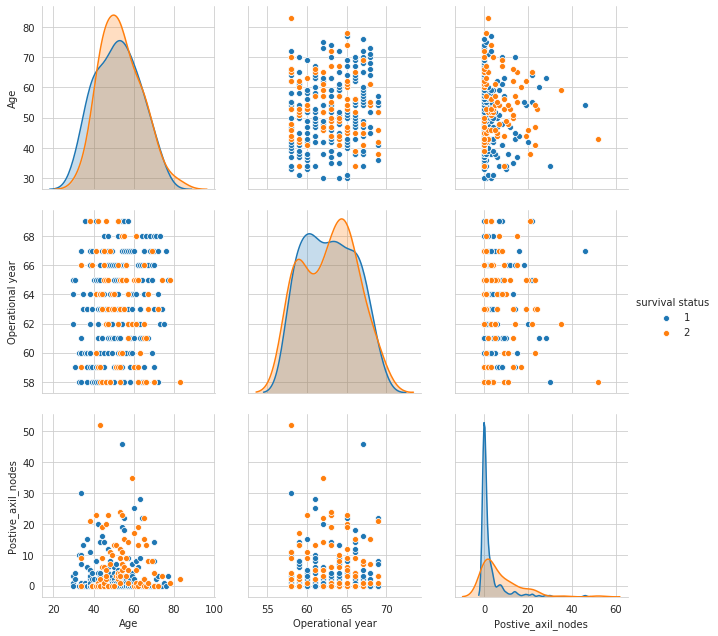

In [0]:
plt.close();
sns.set_style("whitegrid")
sns.pairplot(df_haberman,hue="survival status",vars=['Age', 'Operational year', 'Postive_axil_nodes'],height=3)
plt.show()


**Observations:**

*   By using pair-plot,we cannot distinguish the two survival status(i.e. whether the patient will survive or not) as there is huge overlap.It is not linearly seperable..



**PDF of Age**


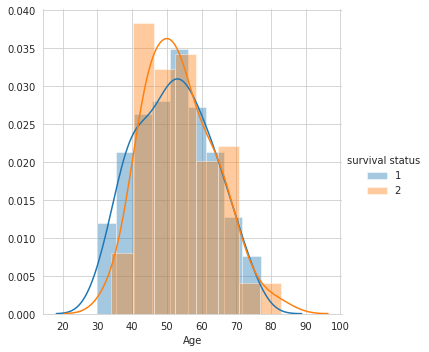

In [0]:
sns.FacetGrid(df_haberman,hue="survival status",height=5).map(sns.distplot,"Age").add_legend()
plt.show()


**PDF of Operational Year**

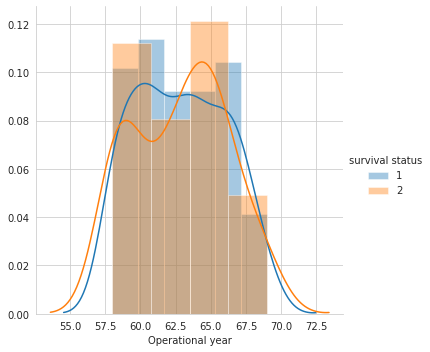

In [0]:
sns.FacetGrid(df_haberman,hue="survival status",height=5).map(sns.distplot,"Operational year").add_legend()
plt.show()

**PDF of Axillary lymph nodes**

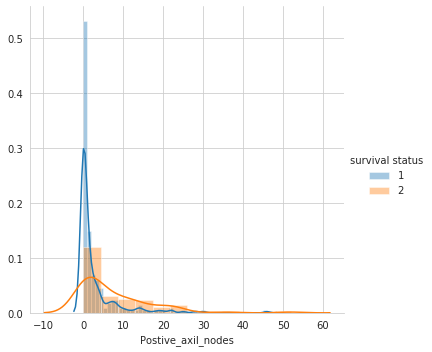

In [0]:
sns.FacetGrid(df_haberman,hue="survival status",height=5).map(sns.distplot,"Postive_axil_nodes").add_legend()
plt.show()

**Observations:**

*   Nothing conclusive in pdf plots as there are massive overlaps.



**CDF of Age**

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


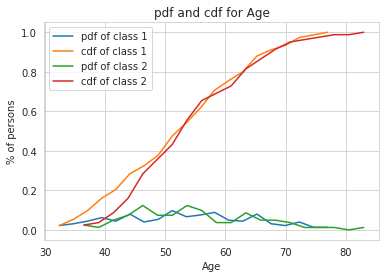

In [0]:
yes=df_haberman.loc[df_haberman["survival status"]==1]
no=df_haberman.loc[df_haberman["survival status"]==2]
counts,bin_edges=np.histogram(yes["Age"],bins=20,density=True)
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.title("pdf and cdf for Age")
plt.xlabel("Age")
plt.ylabel("% of persons")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges=np.histogram(no["Age"],bins=20,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.show()

**Observations**:

*   People having age more than 77 did not survive.
*   People having age less than 37 survived.



**CDF of Operational Year**

[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


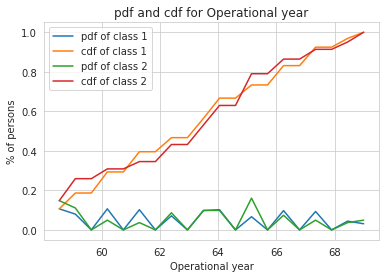

In [0]:
counts,bin_edges=np.histogram(yes["Operational year"],bins=20,density=True)
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.title("pdf and cdf for Operational year")
plt.xlabel("Operational year")
plt.ylabel("% of persons")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges=np.histogram(no["Operational year"],bins=20,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.show()

**CDF of Axillary lymph nodes**

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]


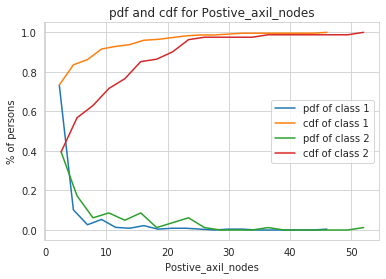

In [0]:
counts,bin_edges=np.histogram(yes["Postive_axil_nodes"],bins=20,density=True)
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.title("pdf and cdf for Postive_axil_nodes")
plt.xlabel("Postive_axil_nodes")
plt.ylabel("% of persons")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges=np.histogram(no["Postive_axil_nodes"],bins=20,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.show()

**Observations:**

*   People having more than 46 axillary lymph nodes died.




**Box plot of axillary nodes**

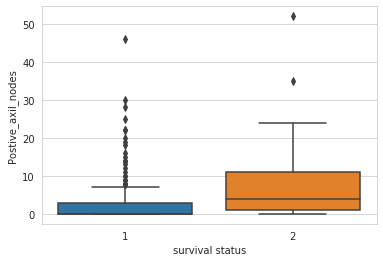

In [0]:
sns.boxplot(x="survival status",y="Postive_axil_nodes",data=df_haberman)
plt.show()

**Observations:**

*   Boxplot of class 1, 75th percentile value of surviving at postive_axil_nodes is 2 
*   Boxplot of class 1, 25th and 50 percentile value overlaps each other.
*   Boxplot of class 2, 75th percentile value of not surviving at postive_axil_nodes is 11





**Violin-plot of Age**

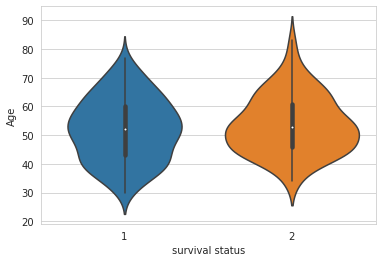

In [0]:
sns.violinplot(x="survival status",y="Age",data=df_haberman)
plt.show()

**Violin-plot of Operational year**

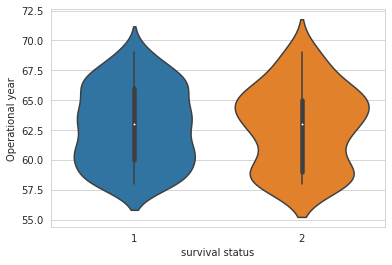

In [0]:
sns.violinplot(x="survival status",y="Operational year",data=df_haberman)
plt.show()

**Observations:**

*   The operations that were done before 1959 have slightly more chance of patients dying.




**Violin-plot of Axillary lymph nodes**

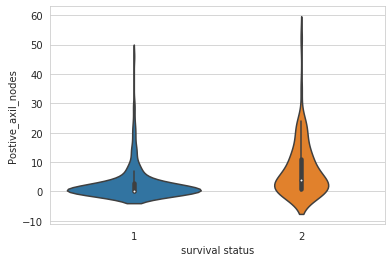

In [0]:
sns.violinplot(x="survival status",y="Postive_axil_nodes",data=df_haberman,size=15)
plt.show()

**Observations:**

*   For survival, many points lie within 0 to 5 axillary lymph nodes.



**Conclusions:**

*   This is an imbalanced dataset.
*   By auxillary lymph nodes, some of the observations can be made. For most of the columns, it is massively overlapping.
*    We cannot use "if-else" condition to build a simple model to predict whether the patient will survive or not.
*   More informations are needed to draw any final inference.



